# Radiation Intensity and Flux

Two primary variables used in describing radiation are *Intensity* ($I$) and *Flux* ($F$).  These can be expressed in a spectral dependent sense (monochromatic) or integrated over several wavelengths ($\lambda$) (broadband).

- Monochromatic (or Spectral) Intensity $I_{\lambda}(\Omega)$
- Monochromatic (or Spectral) Flux $F_{\lambda}$
- Broadband Intensity ($I$) - integrated over several wavelengths.
- Broadband Flux ($F$) - integrated over several wavelengths.

The spectral unit (often wavelength), can also be frequency ($f$) or wavenumber ($\nu$).

*Intensity* is the *flux* per unit solid angle traveling in a particular direction $\Omega$.  If it is for a particular wavelength, we write it as per unit wavelength.

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.integrate as integrate

## Specifying Direction

Direction for radiation is specified by the 3D vector $\Omega$.  We often use spherical polar coordinates to describe direction.  These coordinates include the zenith angle ($\theta$) and azimuthal angle ($\phi$).  

- Zenith angle measures the angle from some reference direction (usually the local vertical).
- Azimuthal angle measures the angle counter clockwise from a reference point on the horizon.

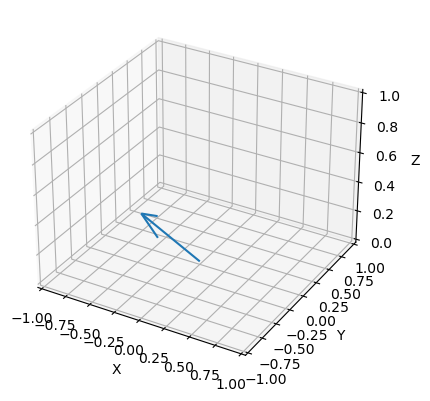

In [23]:
def direction_vector(theta, phi):
    omega_x = np.sin(theta) * np.cos(phi)
    omega_y = np.sin(theta) * np.sin(phi)
    omega_z = np.cos(theta)
    return np.array([omega_x, omega_y, omega_z])

theta = 90 # elevation
phi = 153 # azimuth
omega_x, omega_y, omega_z = direction_vector(np.radians(theta), np.radians(phi))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver([0], [0], [0], [omega_x], [omega_y], [omega_z])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])
ax.set_ylabel('Y')
ax.set_xlabel("X")
ax.set_zlabel("Z")
plt.show()

## Monochromatic Intensity (also known as Monochromatic Radiance)

Monochromatic intensity can be thought of as the *rawest* form in which we can describe radiation.  It represents the flux at a particular wavelength but from the direction $-\Omega$ from a very small element of the scene with solid angle $\delta \omega$.  You can think of it as a narrow beam of radiation or envision it like a infintesimally small laser.

$\large I_{\lambda}(\Omega) = \dfrac{\delta F}{\delta \omega \delta{\lambda}}$

The relationship between $\Omega$ and solid angle is: $\large d \omega = sin(\theta) d \theta d \phi$

In [29]:
def func(theta, phi):
    return np.sin(theta)

zenith_bounds = (0, np.pi) # all zeniths
azimuth_bounds = (0, 2 * np.pi) # all azimuths

result = integrate.dblquad(func, azimuth_bounds[0], azimuth_bounds[1], zenith_bounds[0], zenith_bounds[1])

print("Integration over the entire sphere.")
print("Answer: ", result[0], "steradians")
print("For entire sphere:", 4 * np.pi, "steradians")
print()

zenith_bounds = (0, np.pi/2.) # all zeniths
azimuth_bounds = (0, 2 * np.pi) # all azimuths

result = integrate.dblquad(func, azimuth_bounds[0], azimuth_bounds[1], zenith_bounds[0], zenith_bounds[1])

print("Integration over one hemisphere.")
print("Answer: ", result[0], "steradians")
print("For entire sphere:", 2 * np.pi, "steradians") 

Integration over the entire sphere.
Answer:  12.566370614359172 steradians
For entire sphere: 12.566370614359172 steradians

Integration over one hemisphere.
Answer:  6.283185307179586 steradians
For entire sphere: 6.283185307179586 steradians
